# Working with Numpy and DFT  

Imports
-------

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

## FT: An intuition

With a milk-shake reversal intuition, the FT will allow us to represent a signal in its elementary components.  

<img src="FRULLATO-FOURIER.png" width="400px">

## More precisely

The signal can be written as a   **weighted sum** of simpler signals

$$F[k]= \sum_{n=0}^{N-1}f[n] e^{-i{{2\pi}\over N }kn}$$


<img src="Fourier_series_and_transform.gif">

The Fourier representation is formed by the sum **coefficients**.  

## Part 1 - Introduction and odd / even functions
$f_s$ is the sampling frequency, while $f$ is a base frequency for the signal content. We create a signal that contains components at a couple of multiples of this base frequency. Note the amplitudes here since we will be trying to identify them from the FFT later.

Notice: this is a very special case since the signal we generate are actually combinations of sinudoids 


In [2]:
delta_s = 1./100; #sampling interval
f_s = 1./delta_s; #sampling frequency
print("Sampling interval",delta_s)
print("Sampling frequency",f_s)

f = 1.0 # Hz # sinusoidal signal frequency
T = 3.0;
time = np.arange(0.0, T, delta_s) # sampling points at f_s frequency
N=time.size; 
# HERE IS TO BUILD AN ODD FUNCTION
#y =  5*np.sin(2 * np.pi * f * time) + 1* np.sin(4 * 2 * np.pi * f * time) 

# HERE IS TO BUILD AN EVEN FUNCTION
y = 5*np.cos(2 * np.pi * f * time) + 1* np.cos(10 * 2 * np.pi * f * time) + 1* np.cos(3 * 2 * np.pi * f * time) 
print("Array size",N)

Sampling interval 0.01
Sampling frequency 100.0
Array size 300


Text(0, 0.5, 'y')

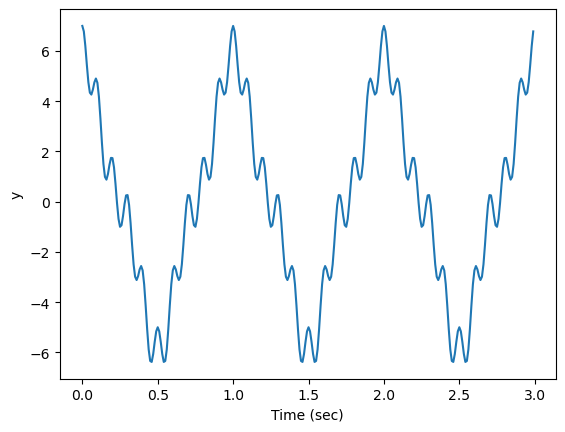

In [3]:
plt.plot(time, y)
plt.xlabel("Time (sec)")
plt.ylabel("y")
#print(y)

### Compute the DFT

Using the ${\tt numpy}$ library, we will compute:

<ul>
    <li>the DFT</li>
    <li>its matching vector of frequencies </li>
    <li>the inverse DFT (back to the signal)</li>
</ul>


The values in the result follow so-called “standard” order: If A = fft(a, n), then A[0] contains the zero-frequency term (the sum of the signal), which is always purely real for real inputs. Then A[1:n/2] contains the positive-frequency terms, and A[n/2+1:] contains the negative-frequency terms, in order of decreasingly negative frequency. 

The routine np.fft.fftfreq(n) returns an array giving the frequencies of corresponding elements in the output


In [4]:
fft_y = np.fft.fft(y)
n = len(fft_y)
print(n)
freq = np.fft.fftfreq(n, 1/f_s)

# 0 frequency term
print("F[0]=",fft_y[0])

300
F[0]= (-2.220446049250313e-16+0j)


The function np.abs calculates the absolute value element-wise. For complex input, $a + ib$, the
    absolute value is <I> real </I>: $\sqrt{ a^2 + b^2 }$.
    
    

### Plotting the DFT   
The absolute value incorporates 

(-2.220446049250313e-16+0j)


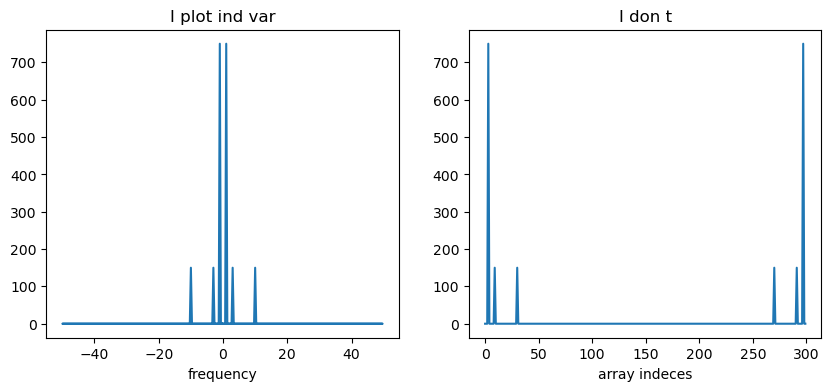

In [5]:
# IT'S JUST A "VISUAL ILLUSION"!
#NOTICE THE DIFFERENCE IN THE PLOT IF I

plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.plot(freq,np.abs(fft_y))
plt.xlabel('frequency');
plt.title("I plot ind var")
plt.subplot(1,2,2)
plt.plot(np.abs(fft_y))
plt.xlabel('array indeces');
plt.title('I don t');

# but fft_y does not change
print (fft_y[0])

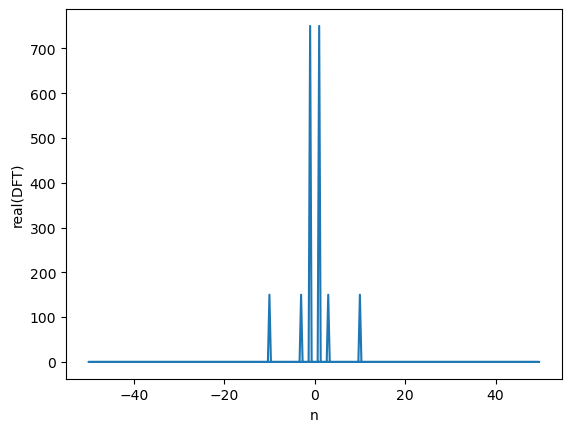

In [6]:
#real component
R=np.real(fft_y);
plt.xlabel('n')
plt.ylabel("real(DFT)")
plt.plot(freq,R)

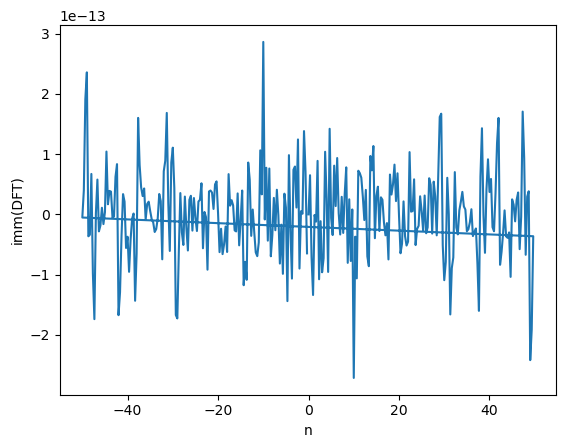

In [7]:
#imag component
Im=np.imag(fft_y);
plt.xlabel('n')
plt.ylabel("imm(DFT)")
plt.plot(freq,Im)

### Swap Half Spaces
 
Note that frequencies in the DFT and the `freq` vector go from zero to some larger positive number then from a large negative number back toward zero. We can swap that so that the DC component is in the center of the vector while maintaining a two-sided spectrum.

In [8]:
fft_y_shifted = np.fft.fftshift(fft_y)
freq_shifted = np.fft.fftshift(freq)

Text(0.5, 1.0, 'Imaginary part')

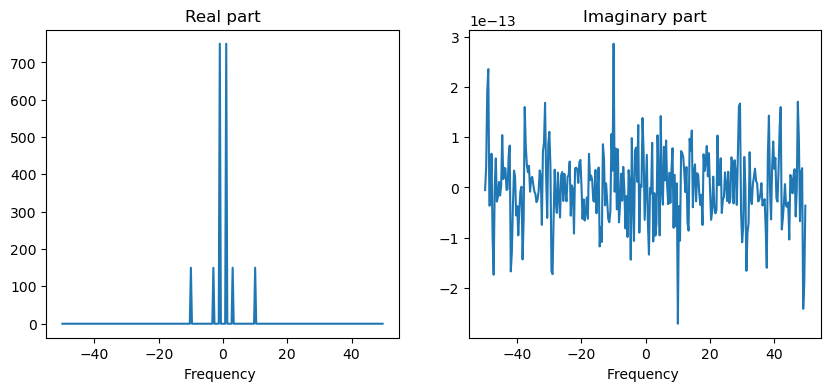

In [9]:
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.plot(freq_shifted, np.real(fft_y_shifted)) # it does not change
plt.xlabel("Frequency ")
plt.title("Real part")
plt.subplot(1,2,2)
plt.plot(freq_shifted, np.imag(fft_y_shifted)) # it does not change
plt.xlabel("Frequency ")
plt.title("Imaginary part")

### Back to the signal
 

Text(0, 0.5, 'y')

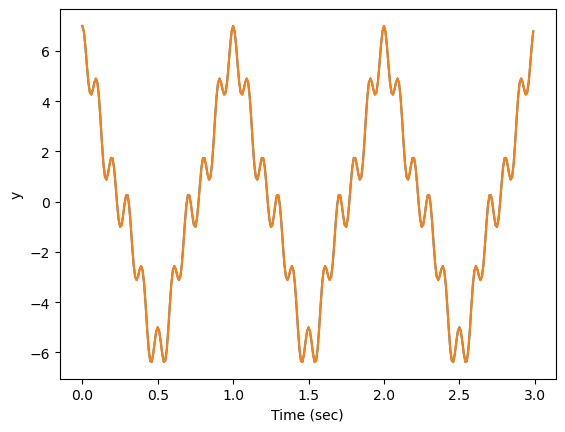

In [10]:
# inverse DFT
fft_y_shifted_back = np.fft.ifftshift(fft_y_shifted)

# NOTICE WHAT HAPPENS IF I DON'T SHIFT THE SIGNAL
#fft_y_shifted_back = np.fft.ifft(fft_y)

y_rec=np.fft.ifft(fft_y_shifted_back)
plt.plot(time, y_rec.real) # real part of inverse FFT
plt.plot(time,y) #original signal
plt.xlabel("Time (sec)")
plt.ylabel("y")

## Part 2: another example

In [11]:
f_s = 512.0 # Hz
T=1.0;

time = np.arange(0, T , 1/f_s) # sampling at f_s frequency starting from 0 (shifted signal) 
 
N=time.size;  # sampling points 
y= np.zeros(time.size)
y[int(N/4):int(N/2)]=4*time[int(N/4):int(N/2)]-1;
y[int(N/2):3*int(N/4)]=-4*time[int(N/2):3*int(N/4)]+3;

Text(0, 0.5, 'y')

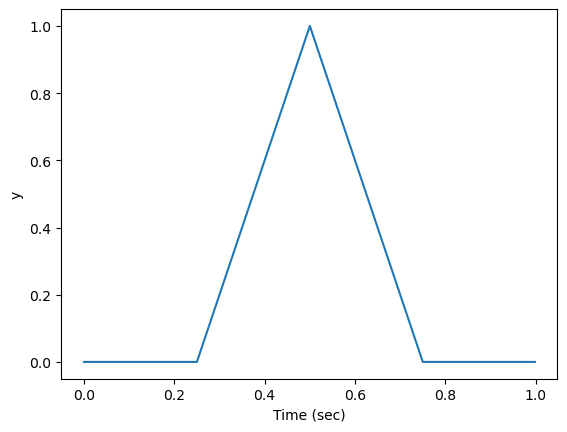

In [12]:
plt.plot(time, y)
plt.xlabel("Time (sec)")
plt.ylabel("y")

In [13]:
# DFT computation
fft_y = np.fft.fft(y)
freq = np.fft.fftfreq(n, 1/f_s)

n = len(fft_y)
print (n)

# zero-frequency component
print(fft_y[0]) 
print(np.sum(y))


512
(128+0j)
128.0


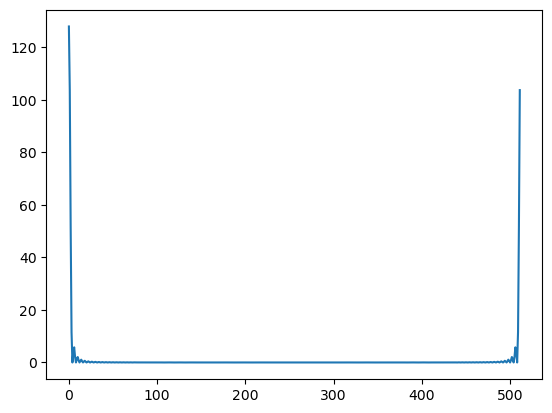

In [14]:
plt.plot(np.abs(fft_y))

Text(0.5, 1.0, 'Imaginary part')

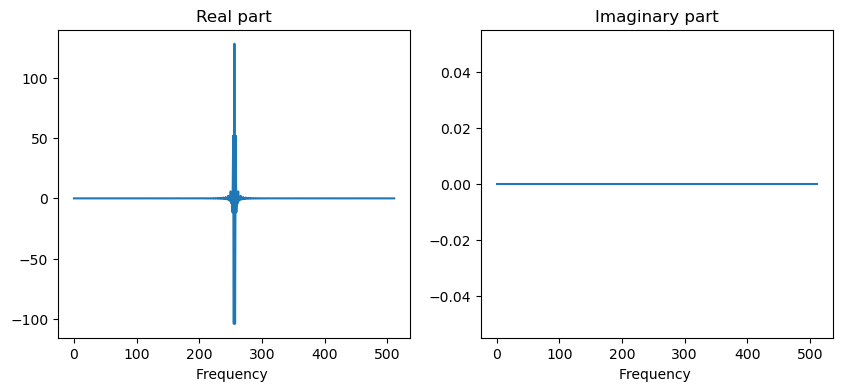

In [17]:
fft_y_shifted = np.fft.fftshift(fft_y)
freq_shifted = np.fft.fftshift(freq)

plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
#plt.plot(freq_shifted, np.real(fft_y_shifted)) # it does not change
plt.plot(np.real(fft_y_shifted))
plt.xlabel("Frequency ")
plt.title("Real part")
plt.subplot(1,2,2)
#plt.plot(freq_shifted, np.imag(fft_y_shifted)) # it does not change
plt.plot( np.imag(fft_y_shifted))
plt.xlabel("Frequency ")
plt.title("Imaginary part")

Text(0.5, 0, 'Frequency (Hz)')

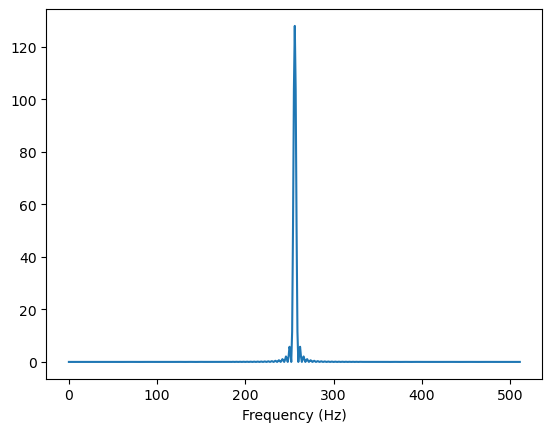

In [19]:

plt.plot(np.abs(fft_y_shifted))
plt.xlabel("Frequency (Hz)")

Text(0.5, 1.0, 'IDFT')

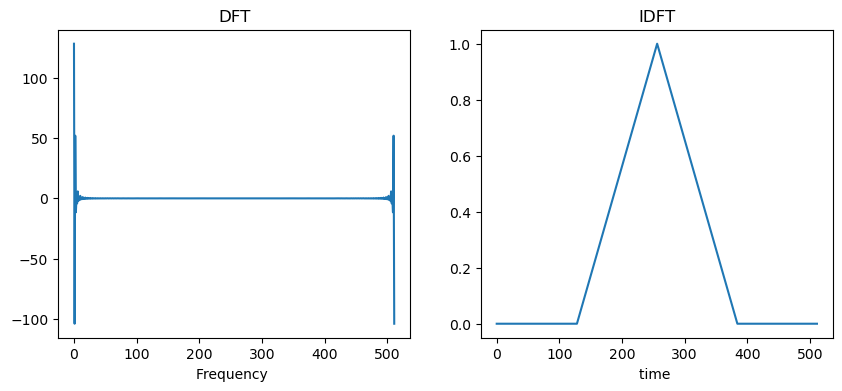

In [20]:

y_rec=np.fft.ifft(fft_y)

plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.plot(np.real(fft_y)) # it does not change
plt.xlabel("Frequency ")
plt.title("DFT")
plt.subplot(1,2,2)
plt.xlabel("time ")
plt.plot(y_rec.real) # real part of inverse FFT
plt.title("IDFT")

Text(0.5, 1.0, 'IDFT')

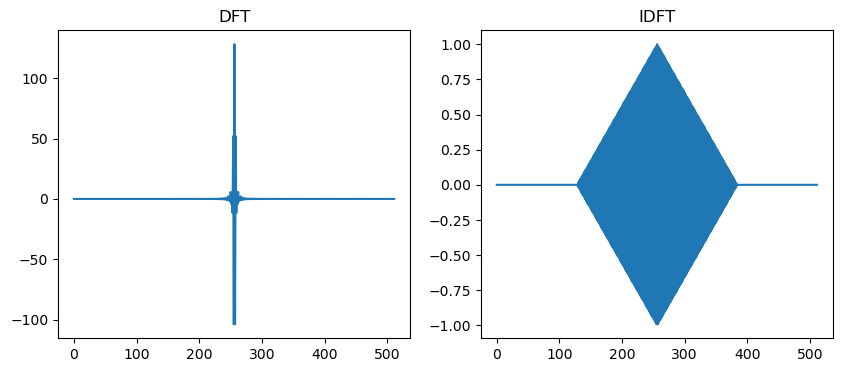

In [21]:
# BACK FROM THE SHIFTED VERSION 

plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.plot(np.real(fft_y_shifted)) # it does not change
 
plt.title("DFT")
plt.subplot(1,2,2)
 
plt.plot(np.fft.ifft(fft_y_shifted).real) # real part of inverse FFT
plt.title("IDFT")

Text(0.5, 1.0, 'IDFT')

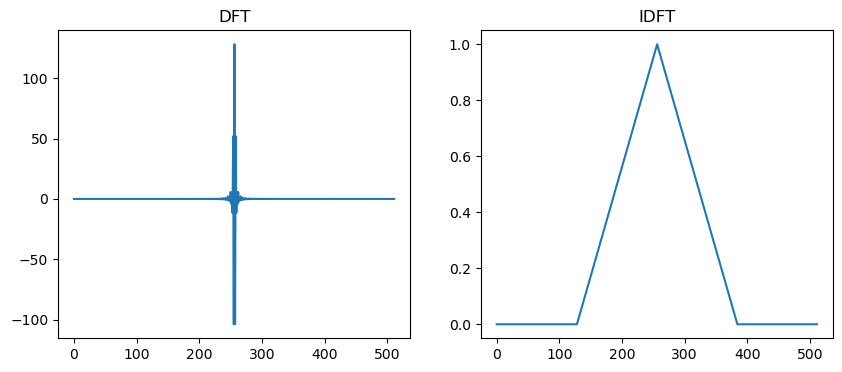

In [22]:
# inverse DFT
fft_y_shifted = np.fft.fftshift(fft_y)
y_rec=np.fft.ifft(np.fft.ifftshift(fft_y_shifted))

plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.plot(np.real(fft_y_shifted)) # it does not change
#plt.xlabel("Frequency ")
plt.title("DFT")
plt.subplot(1,2,2)
#plt.xlabel("time ")
plt.plot(y_rec.real) # real part of inverse FFT
plt.title("IDFT")